# Project - Analysis of New York City Schools Performance
- In this project, we will explore relationships between SAT scores and demographic factors in New York City public schools. 
-  ***Background***  SAT, or Scholastic Aptitude Test is a test that high school seniors in the U.S. take every year. The SAT has three sections, each of which is worth a maximum of 800 points. Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school. New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test.

- We'll be using data about New York City public schools, which can be found [here](https://data.cityofnewyork.us/browse?category=Education).
The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

[SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
[School attendance ](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt)- Attendance information for each school in New York City
[Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
[AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
[Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
[Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
[School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for d in data_files:
    d_split=d.split('.')
    df_name=d_split[0]
    print (df_name)
    d=pd.read_csv(d)
    data[df_name]=d
  

ap_2010
class_size
demographics
graduation
hs_directory
sat_results


In [2]:
print(data["sat_results"].head())

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

In [3]:
for df_name in data:
    print(data[df_name].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

In [4]:
#Comnbining Survey(text files)
all_survey=pd.read_csv("survey_all.txt",delimiter='\t',encoding="windows=1252")
d75_survey=pd.read_csv("survey_d75.txt",delimiter='\t',encoding="windows=1252")
survey=pd.concat([all_survey,d75_survey],axis=0)
print(survey.shape)
print(survey.head())


(1702, 2773)
      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      

In [5]:
# Reducing data size and creating DBN column
survey['DBN']=survey['dbn']
new_cols=["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey=survey[new_cols]
print(survey.shape)
data['survey']=survey
print(data['survey'].shape)

(1702, 23)
(1702, 23)


In [6]:
# Creating DBN columns for datasets for which it does not exist
data['hs_directory']['DBN']=data['hs_directory']['dbn'] # only capitalization issue
def pad_csd(n):
    return str(n).zfill(2) #str.zfill(width)
data['class_size']['padded_csd']=data['class_size']['CSD'].apply(pad_csd)
data['class_size']['DBN']= data['class_size']['padded_csd']+data['class_size']['SCHOOL CODE']
print(data['class_size'].head(3)) # Extracting DBN column from 'CSD' and 'SCHOOL CODE'

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   
2                           -                               17.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0               

In [7]:
# Combining three sat subjs results into a single total result
sat_cols=['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score','SAT Writing Avg. Score']
for c in sat_cols:
    data['sat_results'][c]=pd.to_numeric(data["sat_results"][c],errors='coerce')
data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score'] + data['sat_results']['SAT Critical Reading Avg. Score'] + data['sat_results']['SAT Writing Avg. Score']
print(data['sat_results']['sat_score'].head())
    



0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


In [8]:
# Parsing geographic coordinates for schools using a regex
# Lattitude
import re

coords=data["hs_directory"]["Location 1"].str.extract(r'(\(.+\))')
coords_list=coords[0].str.replace("(",'').str.replace(')','').str.split(',').str[0]
print(coords.head())
print(coords_list.head())
def lat(x):
    for loc_list in coords_list:
        latt=coords_list[0]
        return latt
data["hs_directory"]["lat"]=data["hs_directory"]["Location 1"].apply(lat)    
print(data["hs_directory"]["lat"].head())



                               0
0  (40.601989336, -73.762834323)
1  (40.593593811, -73.984729232)
2  (40.692133704, -73.931503172)
3   (40.822303765, -73.85596139)
4  (40.773670507, -73.985268558)
0    40.601989336
1    40.593593811
2    40.692133704
3    40.822303765
4    40.773670507
Name: 0, dtype: object
0    40.601989336
1    40.601989336
2    40.601989336
3    40.601989336
4    40.601989336
Name: lat, dtype: object


- Can also use below code for same results:
```
import re
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
print(data["hs_directory"].head())
```

In [9]:
# Parsing geographic coordinates for schools using a regex
# Longitude
coords=data["hs_directory"]["Location 1"].str.extract(r'(\(.+\))')
coords_list=coords[0].str.replace("(",'').str.replace(')','').str.split(',').str[1]
print(coords_list.head())
def long(x):
    for loc_list in coords_list:
        long=coords_list[1]
        return long
data["hs_directory"]["lon"]=data["hs_directory"]["Location 1"].apply(long)    
print(data["hs_directory"]["lon"].head())


0     -73.762834323
1     -73.984729232
2     -73.931503172
3      -73.85596139
4     -73.985268558
Name: 0, dtype: object
0     -73.984729232
1     -73.984729232
2     -73.984729232
3     -73.984729232
4     -73.984729232
Name: lon, dtype: object


In [10]:
# Converting lat and lon columns to numeric values
data["hs_directory"]["lat"]=pd.to_numeric(data["hs_directory"]["lat"],errors='coerce')
data["hs_directory"]["lon"]=pd.to_numeric(data["hs_directory"]["lon"],errors='coerce')


### Combining Data
- First we need to condense the datasets before combining them such that the `DBN` column has one unique value instead of being repeated as we are going to use `DBN` as key for merger. 
- Let us first define a function which will tell us whether the DBN entries are unique or repetitious. 

In [11]:
len_sat=data['sat_results']['DBN'].shape
print(len_sat)
value_sat=data['sat_results']['DBN'].value_counts(dropna=False)
value_bool=value_sat>1
print(value_sat[value_bool]) # turns out to be empty, so no repetitive values of DBN
print(value_sat[value_bool].count()) # rechecked, turns out to be 0

(478,)
Series([], Name: DBN, dtype: int64)
0


In [12]:
len_class=data['class_size']['DBN'].shape
print(len_class)
value_class=data['class_size']['DBN'].value_counts(dropna=False)
value_bool=value_class>1
value_bool1=value_class==1
print(value_class[value_bool]) 
print(value_class[value_bool].sum()) # checking for DBN>1 which turns out to be equal to length of dataset
print(value_class[value_bool1].sum()) # checking for DBN=1 which turns out to be 0
print(value_class[value_bool].count()) # 1487 unique entries making up total of 27611 entries due to repetition

(27611,)
15K429    57
09X505    56
09X517    56
21K690    52
15K448    52
          ..
27Q273     3
24Q290     3
02M267     2
09X090     2
27Q465     2
Name: DBN, Length: 1487, dtype: int64
27611
0
1487


In [13]:
# Checking other columns 
value_class_prog=data['class_size']['PROGRAM TYPE'].value_counts(dropna=False)
print(value_class_prog) # Gen ED is the largest programme

GEN ED     14545
CTT         7460
SPEC ED     3653
NaN         1484
G&T          469
Name: PROGRAM TYPE, dtype: int64


In [14]:
# Checking other columns 
print(data['class_size'].head(1))


   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.0                    19.0   

   SIZE OF LARGEST CLASS DATA SOURCE  SCHOOLWIDE PUPIL-TEACHER RATIO  \
0                   19.0         ATS                             NaN   

  padded_csd     DBN  
0         01  01M015  


In [15]:
data['class_size'].rename(columns={'Grade ':'Grade'})
value_class_grd=data['class_size']['GRADE '].value_counts() #There is a bug, you have to give a space after 'GRADE '
print(value_class_grd) # High School grades are 09-12

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE , dtype: int64


In [16]:
# We will retain high school "GRADE " from 09-12 and PROGRAM TYPE "GEN ED"
class_size=data['class_size']
print(class_size.shape)
class_size_bool1= class_size['PROGRAM TYPE']=='GEN ED' # First filter PROGRAM TYPE
class_size=class_size[class_size_bool1]
print(class_size.shape)
class_size_bool= class_size['GRADE ']=='09-12' # Then filter GRADE
class_size=class_size[class_size_bool]
print(class_size.shape)



(27611, 18)
(14545, 18)
(6513, 18)


In [17]:
# We will retain high school "GRADE " from 09-12 and PROGRAM TYPE "GEN ED"
class_size=data['class_size']
print(class_size.shape)
class_size_bool= class_size['GRADE ']=='09-12' # First filter GRADE
class_size=class_size[class_size_bool]
print(class_size.shape)
class_size_bool1= class_size['PROGRAM TYPE']=='GEN ED' # Then filter PROGRAM TYPE
class_size=class_size[class_size_bool1]  
print(class_size.shape) # Same results for both cases


(27611, 18)
(10644, 18)
(6513, 18)


In [18]:
 # Combined boolean mask will give same result as above
class_size_bool= (class_size['GRADE ']=='09-12') & (class_size['PROGRAM TYPE']=='GEN ED')
class_size=class_size[class_size_bool]
print(class_size.shape)

(6513, 18)


In [19]:
# Using GroupBy to aggregate over DBN values
import numpy as np
class_size=class_size.groupby('DBN').agg(np.mean) #On a grouped DataFrame, you can pass a list of functions to apply to each column, which produces an aggregated result with a hierarchical index:
class_size.reset_index(inplace=True) # Reset the index of the DataFrame, and use the default one instead.
print(type(class_size))
data["class_size"] = class_size
print(class_size.shape)
print(class_size.head(3))

<class 'pandas.core.frame.DataFrame'>
(583, 8)
      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                               88.0                 4.0   
1  01M332    1                               46.0                 2.0   
2  01M378    1                               33.0                 1.0   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                    18.5              26.571429   
1           22.000000                    21.0              23.500000   
2           33.000000                    33.0              33.000000   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                             NaN  


In [20]:
# Condensing 'demographics' dataset
print(data['demographics'].head())

      DBN                       Name  schoolyear fl_percent  frl_percent  \
0  01M015  P.S. 015 ROBERTO CLEMENTE    20052006       89.4          NaN   
1  01M015  P.S. 015 ROBERTO CLEMENTE    20062007       89.4          NaN   
2  01M015  P.S. 015 ROBERTO CLEMENTE    20072008       89.4          NaN   
3  01M015  P.S. 015 ROBERTO CLEMENTE    20082009       89.4          NaN   
4  01M015  P.S. 015 ROBERTO CLEMENTE    20092010                    96.5   

   total_enrollment prek   k grade1 grade2  ... black_num black_per  \
0               281   15  36     40     33  ...        74      26.3   
1               243   15  29     39     38  ...        68      28.0   
2               261   18  43     39     36  ...        77      29.5   
3               252   17  37     44     32  ...        75      29.8   
4               208   16  40     28     32  ...        67      32.2   

  hispanic_num hispanic_per white_num white_per male_num male_per female_num  \
0          189         67.3         

Above, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

In [21]:
print(data['demographics']['schoolyear'].dtypes)
print(data['demographics'].shape)
data['demographics']=data['demographics'][data['demographics']['schoolyear']==20112012]
print(data['demographics'].shape)
print(data['demographics']['schoolyear'].head(20))

int64
(10075, 38)
(1509, 38)
6      20112012
13     20112012
20     20112012
27     20112012
35     20112012
42     20112012
49     20112012
56     20112012
63     20112012
70     20112012
77     20112012
84     20112012
91     20112012
98     20112012
105    20112012
112    20112012
120    20112012
126    20112012
133    20112012
140    20112012
Name: schoolyear, dtype: int64


In [22]:
# Condensing 'graduation' dataset
print(data['graduation'].shape)
print(data['graduation'].head())

(25096, 23)
    Demographic     DBN                            School Name    Cohort  \
0  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2003   
1  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2004   
2  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2005   
3  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2006   
4  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL  2006 Aug   

   Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
0             5               s                        NaN                 s   
1            55              37                       67.3                17   
2            64              43                       67.2                27   
3            78              43                       55.1                36   
4            78              44                       56.4                37   

   Total Regents - % of cohort  Total Regents - % 

Above, a `Cohort` appears to refer to the year the data represents, and the `Demographic` appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.

In [23]:
print(data['graduation']['Demographic'].dtypes)
print(data['graduation']['Cohort'].dtypes)
data['graduation']=data['graduation'][(data['graduation']['Demographic']=='Total Cohort') & (data['graduation']['Cohort']=='2006')]
print(data['graduation'].shape)
print(data['graduation'].head())                                                                                                  


object
object
(405, 23)
     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3             78              43                       55.1                36   
10           124              53                       42.7                42   
17            90              70                       77.8                67   
24            84              47                       56.0                40   
31           193             105                       54.4                91   

    Total Regents - % of cohort  Total Regen

In [24]:
# Converting 'ap_2010' dataset's datatypes
print(data['ap_2010'].shape)
print(data['ap_2010'].head()) 

(258, 5)
      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  


In [25]:
print(data['ap_2010']['AP Test Takers '].dtypes)
print(data['ap_2010']['Total Exams Taken'].dtypes)
print(data['ap_2010']['Number of Exams with scores 3 4 or 5'].dtypes)
# data['ap_2010']['AP Test Takers ']=pd.to_numeric(str(['ap_2010']['AP Test Takers ']),errors='coerce')
# print(data['ap_2010']['AP Test Takers '].dtypes)
# Dataset columns are already float type, so need to use above hashed code for conversion


float64
float64
float64


### Deciding Merge Strategy
- `pandas.DataFrame.merge()` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), supports four types of joins i.e. left, right, inner, and outer. Each of these join types dictates how pandas combines the rows.
- We'll be using the `DBN` column to identify matching rows across data sets. In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.
- There may be `DBN` values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the `DBN` values in `sat_results` in all of the other data sets, and other data sets may have `DBN` values that don't exist in `sat_results`.
- We'll merge two data sets at a time. For example, we'll merge `sat_results` and `hs_directory`, then merge the result with `ap_2010`, then merge the result of that with `class_size`. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets. The merge strategy we pick will affect the number of rows we end up with.
- Because this project is concerned with determing `demographics` factors that correlate with `SAT score`, we'll want to preserve as many rows as possible from `sat_results` while minimizing null values.
- This means that we may need to use different merge strategies with different data sets. Some of the data sets have a lot of missing `DBN` values. This makes a `left join` more appropriate, because we don't want to lose too many rows when we merge. If we did an `inner join`, we would lose the data for many high schools.
- Some data sets have `DBN` values that are almost identical to those in `sat_results`. Those data sets also have information we need to keep. Most of our analysis would be impossible if a significant number of rows was missing from `demographics`, for example. Therefore, we'll do an `inner join` to avoid missing data in these columns.
- 

In [26]:
for key in data:
    missing_values=data[key]['DBN'].isnull().sum()
    non_null_values=data[key]['DBN'].notnull().sum()
    print(key,':Null:', missing_values) # There are no missing values in 'DBN' column itself
    print(key,':Not Null:', non_null_values) # Rechecking

ap_2010 :Null: 0
ap_2010 :Not Null: 258
class_size :Null: 0
class_size :Not Null: 583
demographics :Null: 0
demographics :Not Null: 1509
graduation :Null: 0
graduation :Not Null: 405
hs_directory :Null: 0
hs_directory :Not Null: 435
sat_results :Null: 0
sat_results :Not Null: 478
survey :Null: 0
survey :Not Null: 1702


In [27]:
# Merge 'sat_results' with 'left join' on 'ap_2010' and 'graduation'
combined = data["sat_results"]
combined=combined.merge(right=data['ap_2010'],on='DBN',how='left')
combined=combined.merge(right=data['graduation'],on='DBN',how='left')
print(combined.shape)
print(combined.head(3))

(479, 33)
      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   

                     SchoolName  AP Test Takers   Total Exams Taken  ...  \
0                           NaN              NaN                NaN  ...   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0  ...   
2        EAST SIDE COMMUNITY HS

In [28]:
# merge 'combined' with 'class_size', 'demographics', 'survey', and 'hs_directory' with 'inner join'
combined=combined.merge(right=data['class_size'],on='DBN',how='inner')
combined=combined.merge(right=data['demographics'],on='DBN',how='inner')
combined=combined.merge(right=data['survey'],on='DBN',how='inner')
combined=combined.merge(right=data['hs_directory'],on='DBN',how='inner')
print(combined.shape)
print(combined.head(3))


(363, 165)
      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   

                     SchoolName  AP Test Takers   Total Exams Taken  ...  \
0                           NaN              NaN                NaN  ...   
1  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0  ...   
2        EAST SIDE COMMUNITY H

In [29]:
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Columns: 165 entries, DBN to lon
dtypes: float64(69), int64(12), object(84)
memory usage: 470.8+ KB
None


### Filling in Missing Values
- We will replace missing values with means of that column using `df.mean()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) while keeping the argument `skipna` to its default value i.e. `True` followed by `df.fillna()` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- If missing values still exist, we will replace them with zeros.  

In [30]:
combined_means=combined.mean(axis=0,skipna=True)
combined=combined.fillna(combined_means)
print(combined.isnull().sum())
combined=combined.fillna(0)
print(combined.isnull().sum())


DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
BIN                                0
BBL                                0
NTA                                2
lat                                0
lon                                0
Length: 165, dtype: int64
DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
SAT Math Avg. Score                0
                                  ..
BIN                                0
BBL                                0
NTA                                0
lat                                0
lon                                0
Length: 165, dtype: int64


In [31]:
# Just rechecking
nta_null=combined['NTA'].isnull()
print(combined['NTA'][nta_null])# gives empty series
print(combined.info())

Series([], Name: NTA, dtype: object)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Columns: 165 entries, DBN to lon
dtypes: float64(73), int64(12), object(80)
memory usage: 470.8+ KB
None


### Adding a School District Column for Mapping
- Adding a column to the data set that specifies the school district will help us accomplish this.
- The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

In [32]:
def dist_code(x):
    code=x[0:2]
    return code
combined['school_dist']=combined['DBN'].apply(dist_code)
print(combined['school_dist'].head())
print(combined['DBN'].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object
0    01M292
1    01M448
2    01M450
3    01M509
4    01M539
Name: DBN, dtype: object


# Analyzing and Visualizing Data
- We'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and sat_score. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.
- Correlations tell us how closely related two columns are. We'll be using the [r value](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.
- Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.
We can use the `pandas.DataFrame.corr(` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.

In [33]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)


SAT Critical Reading Avg. Score    9.868201e-01
SAT Math Avg. Score                9.726430e-01
SAT Writing Avg. Score             9.877708e-01
sat_score                          1.000000e+00
AP Test Takers                     5.231404e-01
                                       ...     
Census Tract                       4.873721e-02
BIN                                5.223209e-02
BBL                                4.442696e-02
lat                               -2.407260e-15
lon                                2.407260e-15
Name: sat_score, Length: 85, dtype: float64


0.37


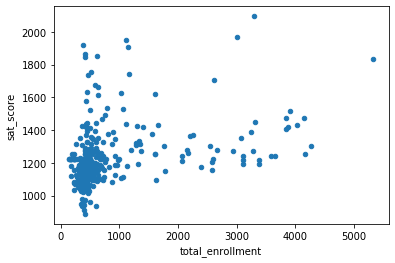

In [34]:
#Create a scatterplot of total_enrollment versus sat_score
print(correlations.loc['total_enrollment'].round(2))

%matplotlib inline
import matplotlib.pyplot as plt
combined.plot(x='total_enrollment', y='sat_score', kind='scatter',)
plt.show()

- Exploring schools with both low SAT scores and Enrolmlent. 
It doesn't appear that there's an extremely strong correlation between sat_score and total_enrollment.
However, there's an interesting cluster of points at the bottom left where total_enrollment and sat_score are both low. This cluster may be what's making the `r`(0.37) value so high.
- We will Filter the combined dataframe to keep only those rows where `total_enrollment` is under 1000 and `sat_score` is under 1000. Assign the result to `low_enrollment`.

In [35]:
low_enrolment=combined[(combined['total_enrollment']<1000) & (combined['sat_score']<1000)]
print(low_enrolment)

        DBN                                       SCHOOL NAME  \
91   07X334               INTERNATIONAL COMMUNITY HIGH SCHOOL   
125  09X365               ACADEMY FOR LANGUAGE AND TECHNOLOGY   
126  09X403                   BRONX INTERNATIONAL HIGH SCHOOL   
139  10X268             KINGSBRIDGE INTERNATIONAL HIGH SCHOOL   
141  10X342             INTERNATIONAL SCHOOL FOR LIBERAL ARTS   
176  12X388  PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE   
179  12X550                     HIGH SCHOOL OF WORLD CULTURES   
188  13K439                BROOKLYN INTERNATIONAL HIGH SCHOOL   
225  17K524     INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS   
237  18K563                        IT TAKES A VILLAGE ACADEMY   
253  19K583                         MULTICULTURAL HIGH SCHOOL   
286  24Q296            PAN AMERICAN INTERNATIONAL HIGH SCHOOL   

    Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
91                      34                            310.0   
125                     54  

Most of the high schools above with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually `ell_percent` that correlates strongly with `sat_score`, rather than `total_enrollment`. To explore this relationship further, let's plot out `ell_percen` vs `sat_score`.

-0.4


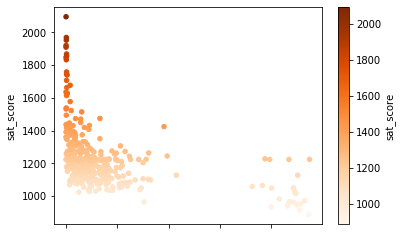

In [36]:
print(correlations.loc['ell_percent'].round(2))
combined.plot(x='ell_percent', y='sat_score', kind='scatter',colormap='Oranges',c='sat_score')

- Mapping School with Basemap. 
It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier.
In order to explore this relationship, we'll want to map out ell_percent by school district. The map will show us which areas of the city have a lot of English language learners.

In [37]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

Above module has a bug so we have written the code below but prevented it from execution using script.

In [38]:
# m = Basemap(projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# ) # Create basemap with NY City coords

# m.drawmapboundary(fill_color='#85A6D9') # draw boundaries on basemap and fill background color
# m.drawcoastlines(color='#6D5F47', linewidth=.4) # draw coastlines on basemap
# m.drawrivers(color='#6D5F47', linewidth=.4) # # draw rivers on basemap

In [39]:
# # Converting from Spherical to Cartesian Coordinates
# longitudes=combined['lon'].tolist()
# latitudes=combined['lat'].tolist()
# x,y=m(longitudes,latitudes) ## won't pass axes coordinates, just for info

In [40]:
# # Creating scatter plot of points on the map
# m.scatter(longitudes,latitudes,s=20,zorder=2,latlon=True) # s is size of the points, zorder=2 implies point cloud in 2nd layer or on top of base map
# # latlon=True implies we are passing coordinates as lat/lons instead of axis
# plt.show()

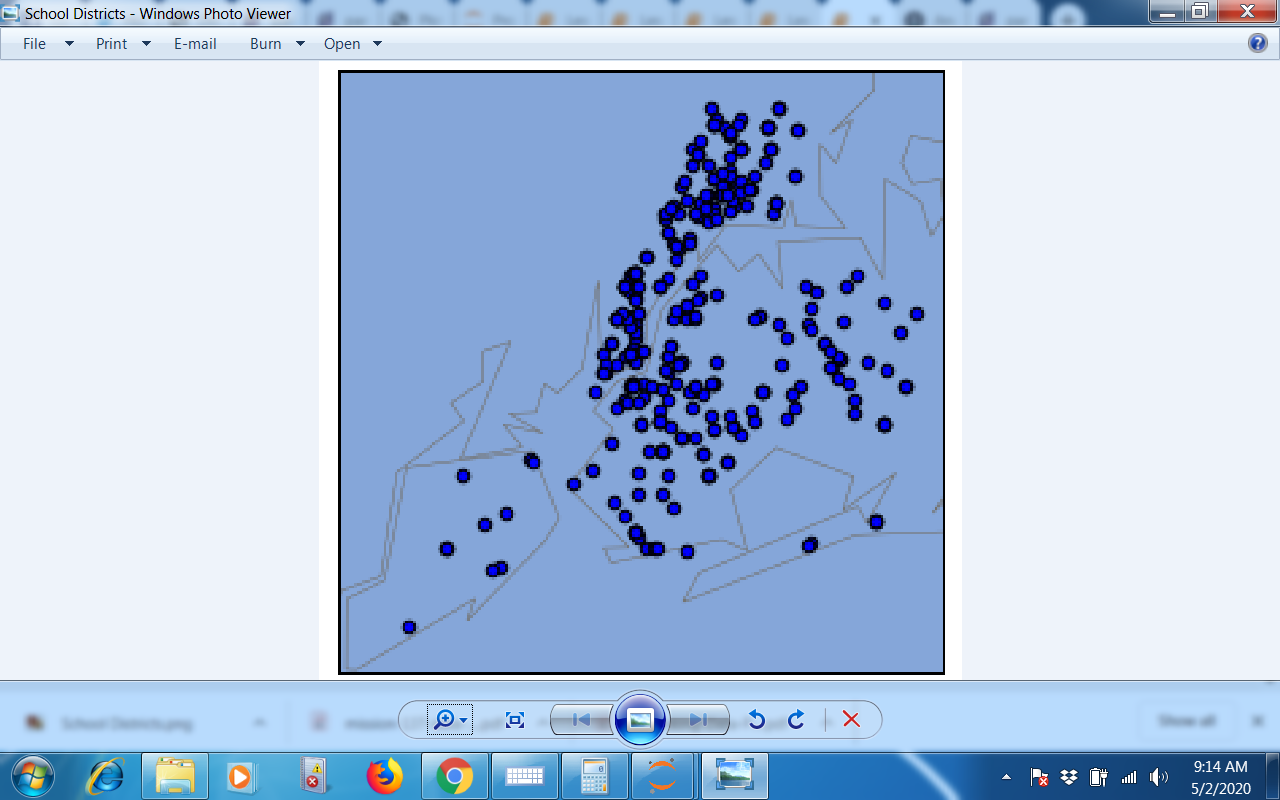

- Plottin out Statistics
From the map , we can see that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.
To highlight pertinent information, we can shade each point in the scatterplot by passing the keyword argument `c`into the `scatter()` method. This argument accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers. 
method will convert the sequence of numbers we pass into the c keyword argument to values ranging from 0 to 1. It will then map these values onto a colormap. Matplotlib has quite a few default [colormaps](https://matplotlib.org/tutorials/colors/colormaps.html). In our case, we'll use the `summer` colormap, which results in green points for low numbers, and yellow points for high numbers.
Let's say we plotted ell_percent by school. If we pass in the keyword argument `c=combined["ell_percent"]`, then the method would shade a school with a high `ell_percent` yellow, and a school with a low ell_percent green. We can specify the colormap we want to use by passing the `cmap` keyword argument to the `scatter()` method.

In [41]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# m = Basemap(projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# ) # Create basemap with NY City coords

# m.drawmapboundary(fill_color='#85A6D9') # draw boundaries on basemap and fill background color
# m.drawcoastlines(color='#6D5F47', linewidth=.4) # draw coastlines on basemap
# m.drawrivers(color='#6D5F47', linewidth=.4) # # draw rivers on Basemap
# # Converting from Spherical to Cartesian Coordinates
# longitudes=combined['lon'].tolist()
# latitudes=combined['lat'].tolist()
# x,y=m(longitudes,latitudes)
# # Creating scatter plot of points on the map
# m.scatter(longitudes,latitudes,s=20,zorder=2,latlon=True,c=combined['ell_percent'],cmap='summer') # s is size of the points, zorder=2 implies point cloud in 2nd layer or on top of base map
# # latlon=True implies we are passing coordinates as lat/lons instead of axis
# # c accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers. 
# # cmap="summer" gets the right color scheme from matplotlib.
# plt.show()

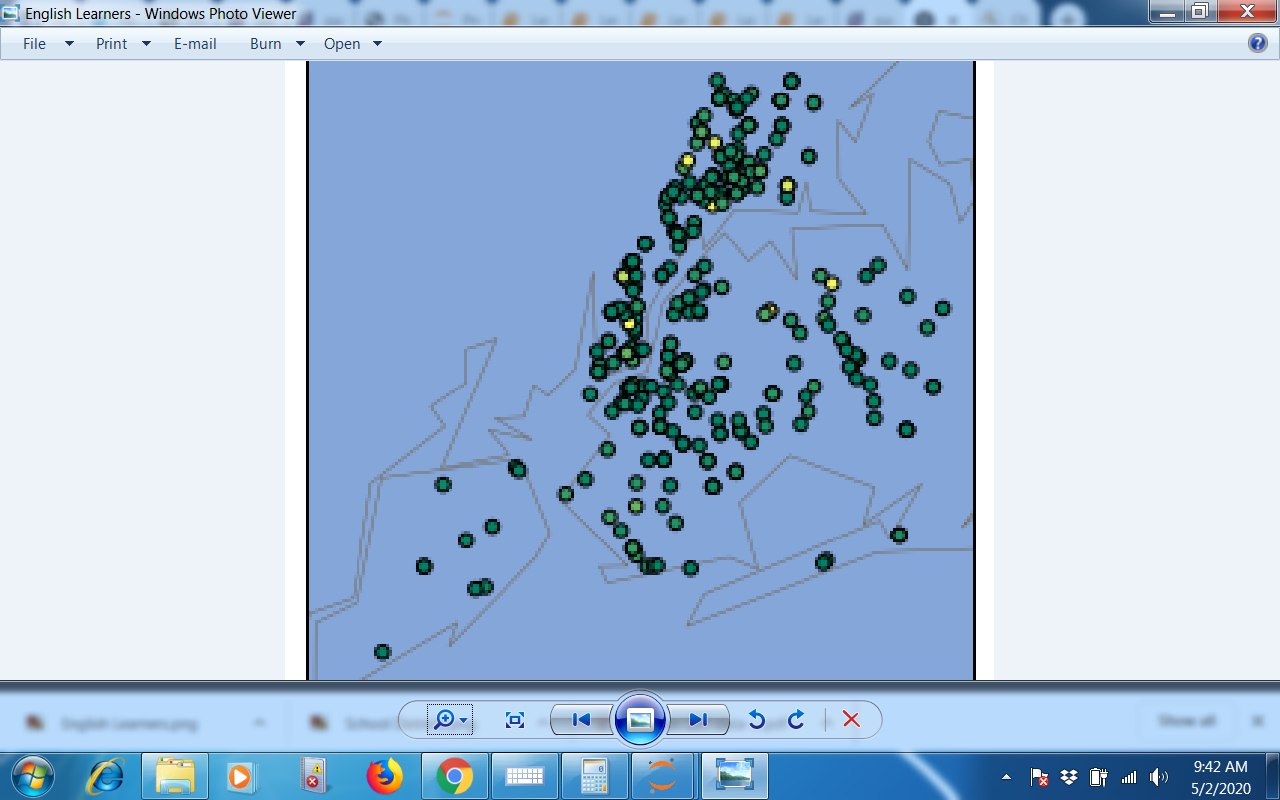

- Calculating District Level Statistics
Due to the number of schools, it's hard to interpret the map above. We can aggregate by district, which will enable us to plot `ell_percent` district-by-district instead of school-by-school.
we will use the `pandas.DataFrame.groupby()` [method](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) followed by the `agg()` [method](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) on the resulting object to find the mean of each column for each unique value in `school_dist`. 

In [42]:
districts=combined.groupby('school_dist').agg(np.mean) #On a grouped DataFrame, you can pass a list of functions to apply to each column, which produces an aggregated result with a hierarchical index:
districts.reset_index(inplace=True) # Reset the index of the DataFrame, and use the default one instead.
print(type(combined))
print(combined.head(3))

<class 'pandas.core.frame.DataFrame'>
      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   

                     SchoolName  AP Test Takers   Total Exams Taken  ...  \
0                             0       129.028846         197.038462  ...   
1  UNIVERSITY NEIGHBORHOOD H.S.        39.000000          49.000000  ...   
2  

- Plotting Percent of English Learners by Districts
Now, we can plot out `ell_percent` by district. Not only did we find the mean of ell_percent, but we also took the means of the lon and lat columns, which will give us the coordinates for the center of each district.

In [43]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# m = Basemap(projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# ) # Create basemap with NY City coords

# m.drawmapboundary(fill_color='#85A6D9') # draw boundaries on basemap and fill background color
# m.drawcoastlines(color='#6D5F47', linewidth=.4) # draw coastlines on basemap
# m.drawrivers(color='#6D5F47', linewidth=.4) # # draw rivers on Basemap
# # Converting from Spherical to Cartesian Coordinates
# longitudes=districts['lon'].tolist()
# latitudes=districts['lat'].tolist()
# x,y=m(longitudes,latitudes)
# # Creating scatter plot of points on the map
# m.scatter(longitudes,latitudes,s=50,zorder=2,latlon=True,c=districts['ell_percent'],cmap='summer') # s is size of the points, zorder=2 implies point cloud in 2nd layer or on top of base map
# # latlon=True implies we are passing coordinates as lat/lons instead of axis
# # c accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers. 
# # cmap="summer" gets the right color scheme from matplotlib.
# plt.show()

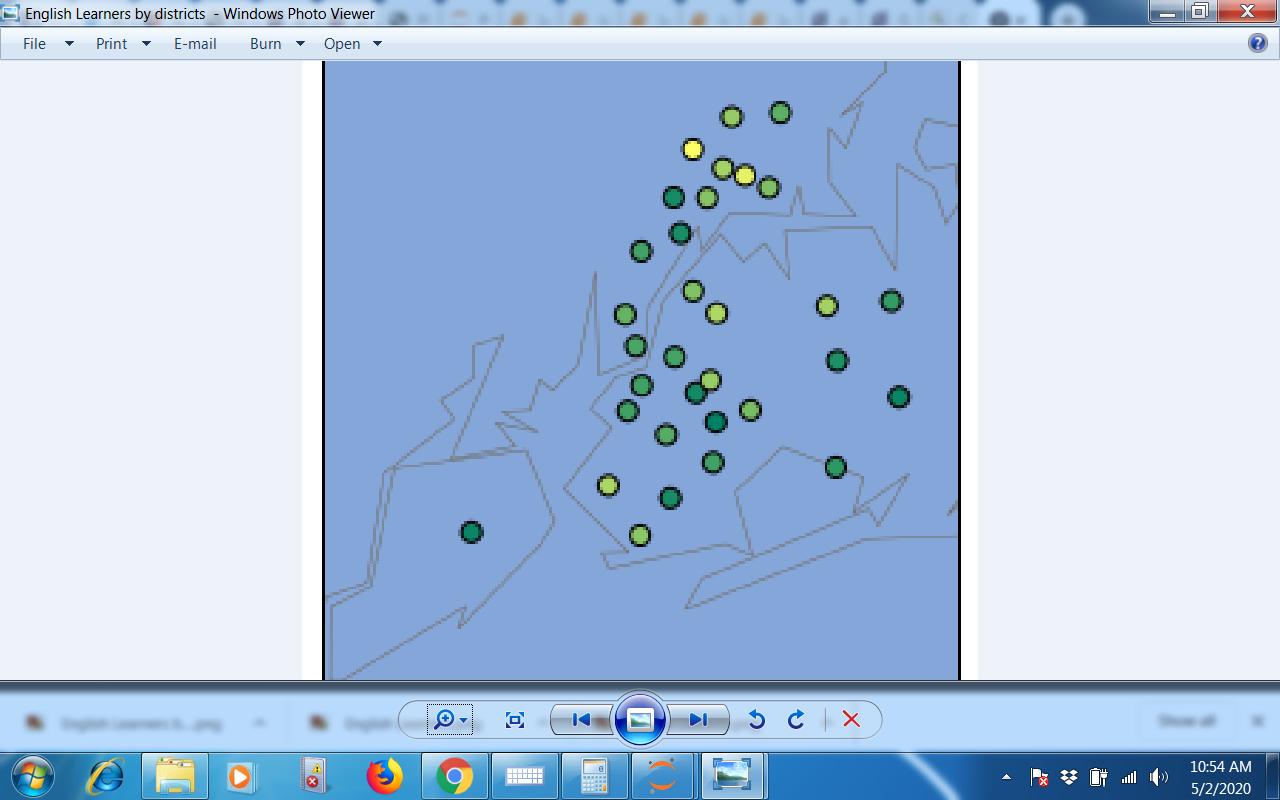

### Correlations between Survey Results and SAT Scores
There are several fields in `combined` dataframe that originally came from a survey of parents, teachers, and students. We will first make a bar plot of the correlations between these fields and `sat_score`. We download survey_fields variable data by consulting the data dictionary that's part of the zip file you can download from the [City of New York's website](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) and remove dbn column from it.

In [44]:
survey_fields=['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']


In [45]:
# remove DBN column
print(type(survey_fields))
survey_corr=correlations.loc[survey_fields]
print(survey_corr)

<class 'list'>
rr_s          0.232199
rr_t         -0.023386
rr_p          0.047925
N_s           0.423463
N_t           0.291463
N_p           0.421530
saf_p_11      0.122913
com_p_11     -0.115073
eng_p_11      0.020254
aca_p_11      0.035155
saf_t_11      0.313810
com_t_11      0.082419
eng_t_11      0.036906
aca_t_11      0.132348
saf_s_11      0.337639
com_s_11      0.187370
eng_s_11      0.213822
aca_s_11      0.339435
saf_tot_11    0.318753
com_tot_11    0.077310
eng_tot_11    0.100102
aca_tot_11    0.190966
Name: sat_score, dtype: float64


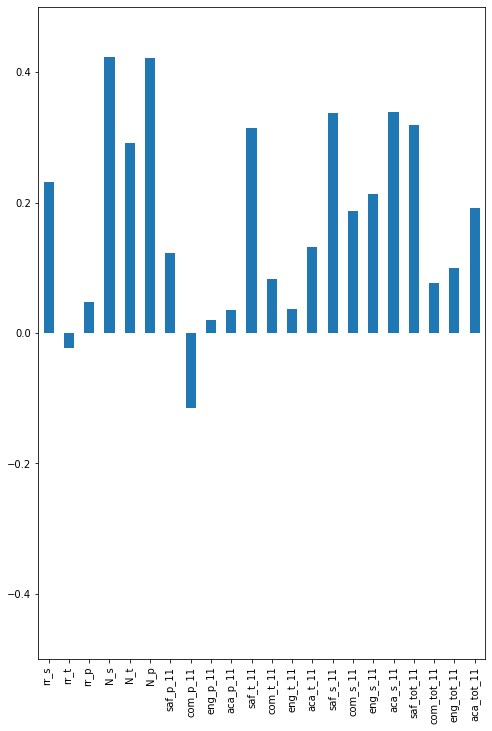

In [46]:
survey_corr.plot(kind='bar',colormap='tab20',ylim=(-0.5,0.5),figsize=(8,12))

### Correlations
There are significant correlations between `N_s`, `N_t`, `N_p` and `sat_score`. All these columns are correlated with `total_enrollment`, and would be high.

`rr_s`, the student response rate, or the percentage of students that completed the survey, correlates with `sat_score`. This could be because students who are more likely to fill out surveys may be more likely to also be doing well academically.

How students and teachers percieved safety (`saf_t_11` and `saf_s_11`) correlate with `sat_score`. This make sense, as it's hard to teach or learn in an unsafe environment.

The last interesting correlation is the `aca_s_11`, which indicates how the student perceives academic standards, correlates with `sat_score`, but this is not true for `aca_t_1`, how teachers perceive academic standards, or `aca_p_11`, how parents perceive academic standards.

### Exploring School Safety and SAT Score
`saf_t_11` is Safety and Respect score based on student responses
`saf_s_11` measure how teachers and students perceive safety at school
Both have r>0.3


In [47]:
print(correlations.loc['saf_t_11'].round(2))
print(correlations.loc['saf_s_11'].round(2))


0.31
0.34


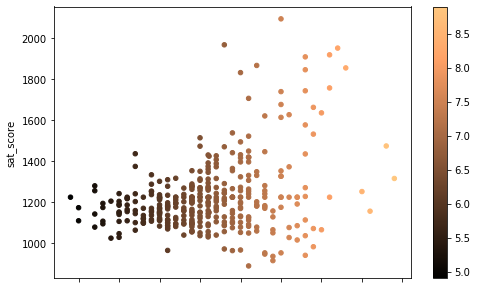

In [48]:
#Scatter Plot
combined.plot(x='saf_s_11',y='sat_score',kind='scatter',colormap='copper',c=combined['saf_s_11'],figsize=(8,5))
plt.xlabel='saf_s_11'
plt.show()


The correlation between `sat_result` and safety perception of students is not very strong as also evident from an r value of 0.34.

### Mapping Safety Scores
We will now map out safety scores on a geographical basis as follows:
- Compute the average safety score for each district.
- Make a map that shows safety scores by district.

In [49]:
districts=combined.groupby('school_dist').agg(np.mean) #On a grouped DataFrame, you can pass a list of functions to apply to each column, which produces an aggregated result with a hierarchical index:
districts.reset_index(inplace=True) # Reset the index of the DataFrame, and use the default one instead.


In [50]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# m = Basemap(projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# ) # Create basemap with NY City coords

# m.drawmapboundary(fill_color='#85A6D9') # draw boundaries on basemap and fill background color
# m.drawcoastlines(color='#6D5F47', linewidth=.4) # draw coastlines on basemap
# m.drawrivers(color='#6D5F47', linewidth=.4) # # draw rivers on Basemap
# # Converting from Spherical to Cartesian Coordinates
# longitudes=districts['lon'].tolist()
# latitudes=districts['lat'].tolist()
# x,y=m(longitudes,latitudes)
# # Creating scatter plot of points on the map
# m.scatter(longitudes,latitudes,s=50,zorder=2,latlon=True,c=districts['saf_s_11'],cmap='copper') # s is size of the points, zorder=2 implies point cloud in 2nd layer or on top of base map
# # latlon=True implies we are passing coordinates as lat/lons instead of axis
# # c accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers. 
# # cmap="summer" gets the right color scheme from matplotlib.
# plt.show()

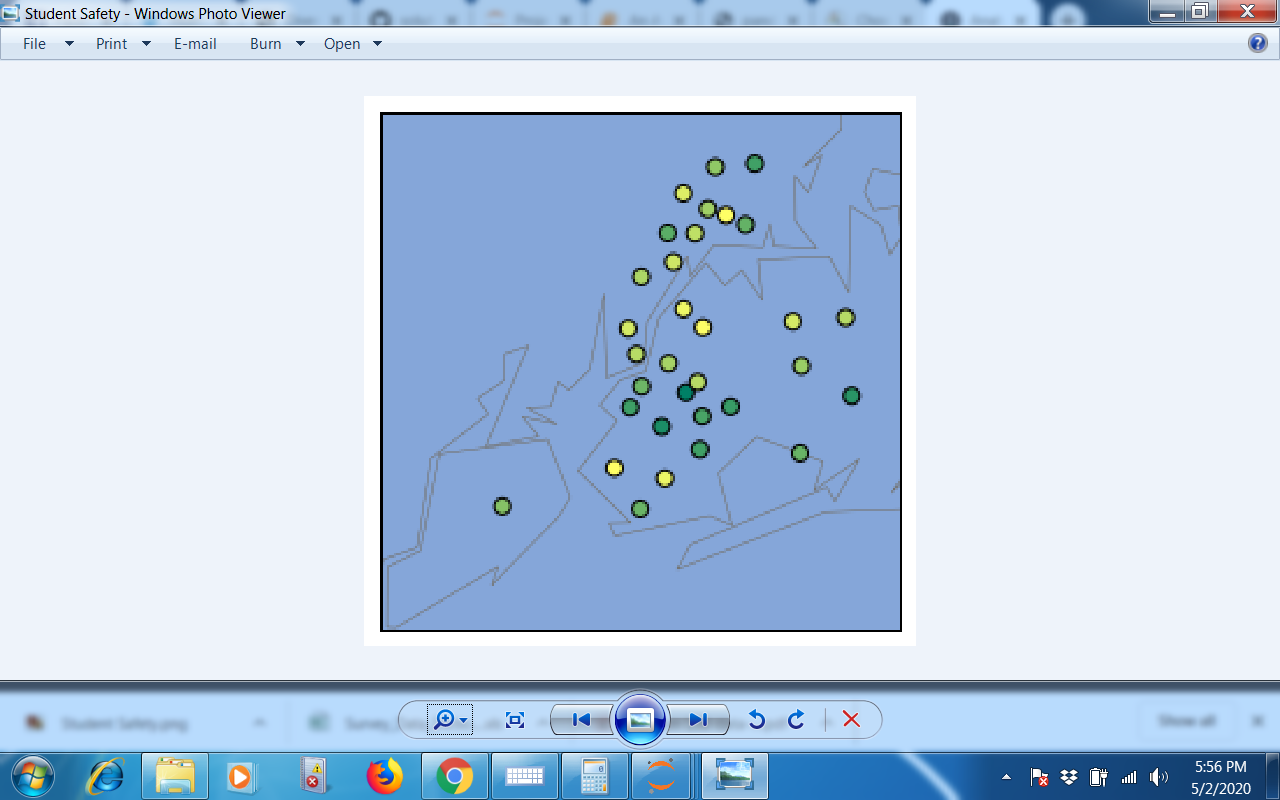

Upper Manhattan and parts of Queens and the Bronx (green shade) tend to have higher safety scores, whereas Brooklyn has low safety scores (yellow shade).

### Exploring Race and `sat_results`
Following columns indicate the percentage of each race at a given school:
`white_per`
`asian_per`
`black_per`
`hispanic_per`

 We will plot out the correlations between these columns and `sat_score`to determine whether there are any racial differences in SAT performance.

In [51]:
races=['white_per','asian_per','black_per','hispanic_per']
race_corr=correlations[races]
print(race_corr)


white_per       0.620718
asian_per       0.570730
black_per      -0.284139
hispanic_per   -0.396985
Name: sat_score, dtype: float64


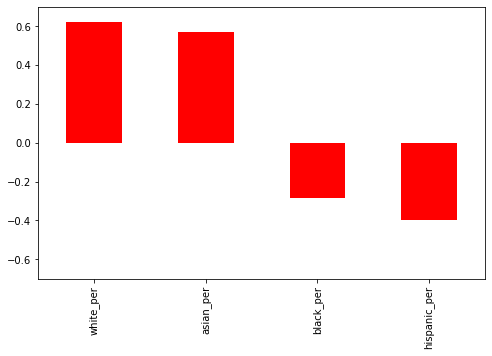

In [52]:
# Plotting above Correlations
race_corr.plot(kind='bar',colormap='autumn',ylim=(-0.7,0.7),figsize=(8,5))
plt.show()

Whites and Asians appear to do better on SATs as compared to Blacks and Hispanics. 

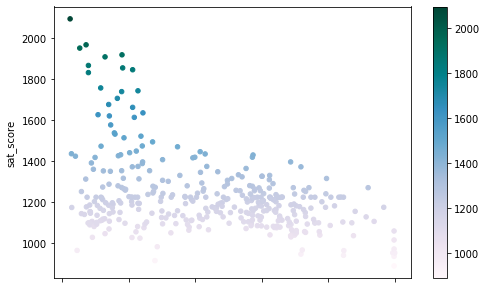

In [62]:
# Exploring Hispanics versus 'sat_score' - Scatter Plot
combined.plot(x='hispanic_per',y='sat_score',kind='scatter',colormap='PuBuGn',c=combined['sat_score'],figsize=(8,5))
plt.xticklabels=combined['hispanic_per']
plt.show()


There is a significant negative correlation (r=-0.4). Some schools (lower right) have a very high percentage of hispanic students and have not done well on SATs. We need to investigate these schools.

In [54]:
# Schools with hispanic_per>95%
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


In [55]:
# Schools with low percentage of ispanic student and who have done well on SATs
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


- Schools with higher percentage of hispanic students cater for immigrants for whom English is not the first language, hence they tend to do poorly on SATs.
- Schools with lower percentage of hispanic students do well because their admission process is otherwise competitive and students doing poorly in entrance requirements are filtered out prior to admission.   

### Exploring Gender and SAT Scores
Following columns  the percentage of each gender at a school:
`male_per`
`female_per`
We will plot out the correlations between each gender percentage and sat_score

In [56]:
genders=['male_per','female_per']
gender_corr=correlations[genders]
print(gender_corr)

male_per     -0.112062
female_per    0.112108
Name: sat_score, dtype: float64


The correlations appear weak. We can plot out to further investigate.

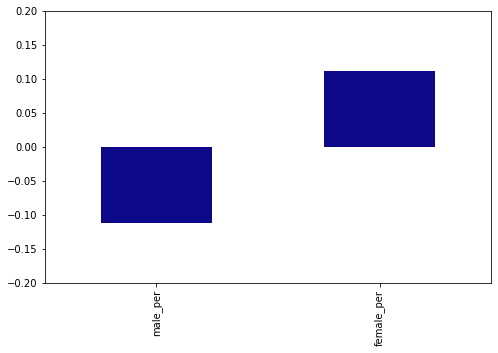

In [57]:
# Exploring genders versus 'sat_score' - Bar Plot
gender_corr.plot(kind='bar',colormap='plasma',ylim=(-0.2,0.2),figsize=(8,5))
plt.show()

Despite weak correlations, it is obvious that a hgher percentage of females correlate positively with SAT scores, while a higher percentage of males correlate negatively with SAT scores. We can investigate further with a scatter plot. 

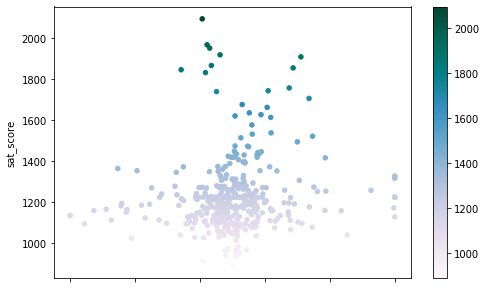

In [58]:
# Exploring Hispanics versus 'sat_score' - Scatter Plot
combined.plot(x='female_per',y='sat_score',kind='scatter',colormap='PuBuGn',c=combined['sat_score'],figsize=(8,5))
plt.xlabel='female_per'
plt.show()


There is no obvious correlation but there are three distinct clusters:
- Lower middle with median female percent and low SAT results (light grey)
- Center middle with median female percent annd above average SAT results(>1400)
- Upper middle-right with higher female percent annd high SAT results (>1600)
There is no obvious relation between female percent and SAT scores but we can investigate further the third cluster with hgiher female percent and high SAT scores. 

In [59]:
# Schools with high female percentage and high SAT score
print(combined[(combined["female_per"] > 60) & (combined["sat_score"] > 1700)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools cater to the upper class students and tend to have higher academic standars. Female ratio is not the factor in better results.

### Exploring Advance Placement and SAT Scores
In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.
Because `total_enrollment` is highly correlated with `sat_score`, we'll look at the percentage of students in each school who took at least one AP exam to avoid bias in our results.

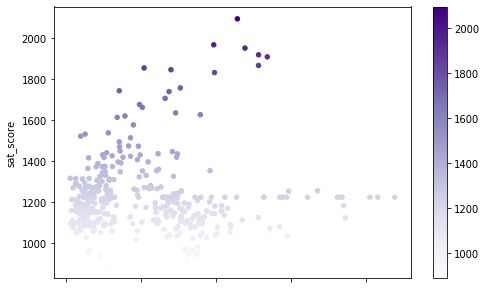

In [60]:
combined['ap_per']=combined['AP Test Takers ']/combined['total_enrollment']*100
combined.plot(x='ap_per',y='sat_score',kind='scatter',colormap='Purples',c=combined['sat_score'],figsize=(8,5))
plt.xlabel='ap_per'
plt.show()

- There is one big cluster at bottom left-middle which suggests correlation between low AP test taker percentage and low SAT results.
- A smaller cluster in middle-right top suggests some correlation between high AP test taker percentage and high SAT results.
- Very few instances of correlation between high AP test taker percentage and low SAT results (bottom right)
- We can check r for this column to be doubly sure of a positive correlation between AP test taker percentage and SAT results

In [61]:
ap_corr=combined.corr()['sat_score']['ap_per']
print(ap_corr)

0.057170813907669614


The value above is close to 0 suggesting no correlation but this is due to the fact that a lot of students with high SAT results do not seem to have taken AP tests.